In [1]:
import pandas as pd

In [2]:
## importing matplotlib
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# Importing Normalizer
from sklearn.preprocessing import Normalizer

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
## importing for linear regression
from sklearn.linear_model import LinearRegression

In [9]:
import math

In [10]:
from math import sqrt

In [11]:
## Importing MAE , MSE , R2 metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [12]:
import numpy as np

In [13]:
from scipy import stats

In [14]:
from scipy.stats import shapiro

In [15]:
from scipy.stats import norm

In [16]:
from scipy.stats import anderson

In [17]:
## importing the CSV File
Data = pd.read_csv("marketing_customer_analysis.csv")

In [19]:
Data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [22]:
## Checking the total null values of each column
Data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [28]:
Data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [26]:
##list of numerical data
num_cols = list(Data._get_numeric_data().columns)

Customer Lifetime Value


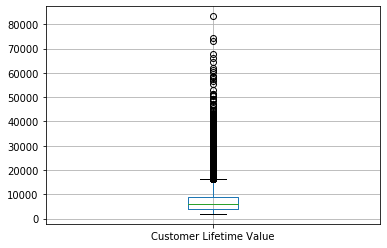

Income


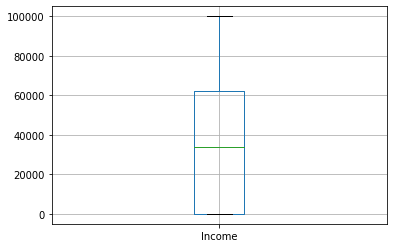

Monthly Premium Auto


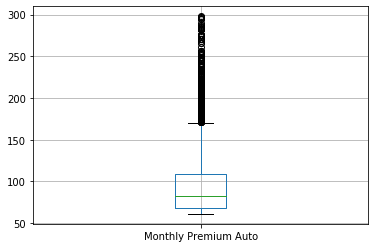

Months Since Last Claim


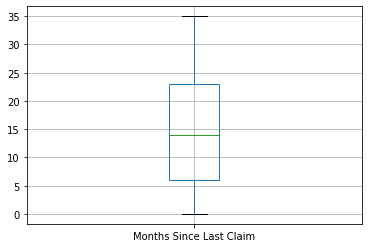

Months Since Policy Inception


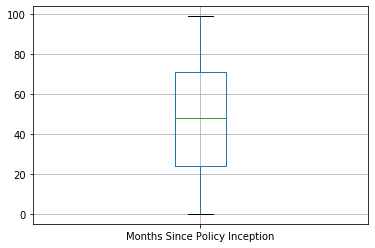

Number of Open Complaints


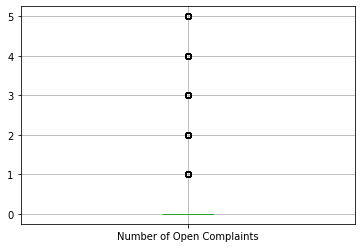

Number of Policies


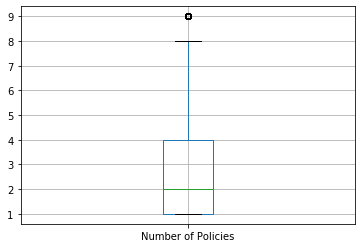

Total Claim Amount


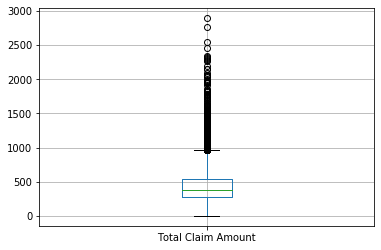

In [27]:
## Ploting the box for num_colums to check outliers
i=0
for i in range(len(num_cols)):
    print (num_cols[i])
    Data.boxplot(num_cols[i])
    plt.show()
i=i+1

 Normality testing by Shapiro Wilk

In [29]:
##num_cols = norm.rvs(size=500)
## the shapiro test is not accurate as the data is more that 5000
shapiro(Data[num_cols])

/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.4013866186141968, 0.0)

 Normality testing by Anderson method

In [30]:
## Anderson method to check the normality of data
for i in range(len(num_cols)):
    x = stats.anderson(Data[num_cols[i]],dist ='norm')
    print (num_cols[i])
    print (x)  
## Null Hypothesis = The distribution is normal
## After the anderson test , 5% cutoff has a higher value of 0.787 
## Hence we do not reject the Null Hypothesis 

Customer Lifetime Value
AndersonResult(statistic=708.6639772973795, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Income
AndersonResult(statistic=196.31733115614225, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Monthly Premium Auto
AndersonResult(statistic=453.6675788446955, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Months Since Last Claim
AndersonResult(statistic=118.01912790124334, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Months Since Policy Inception
AndersonResult(statistic=82.39764909487894, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Number of Open Complaints
AndersonResult(statistic=2040.3595139249737, critical_va

Checking Multicollinearity

In [31]:
## checking the correlation of Data
Data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

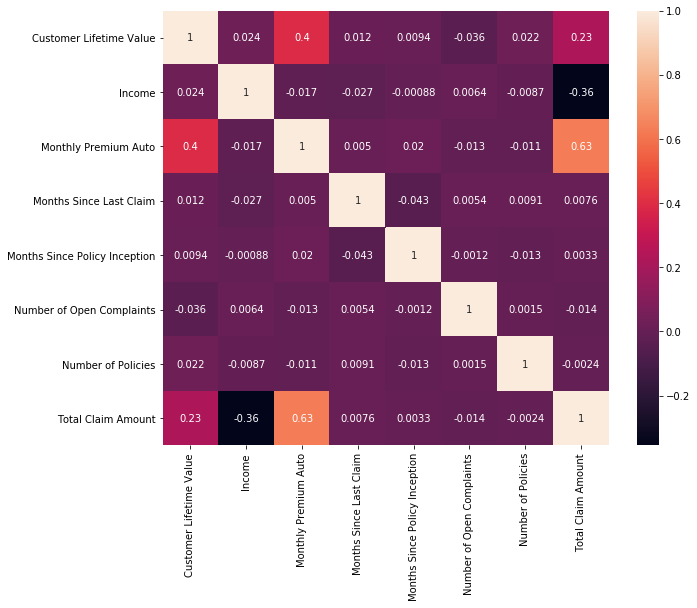

In [32]:
##plotting heat map pearson
corr_matrix = Data.corr(method='pearson')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

Processing the Data

In [33]:
## Selecting the categorical data and dropping column cusotmer and effecetive to date
categorical_data = Data.select_dtypes('object').drop(['Customer','Effective To Date'],axis = 1)

In [34]:
## OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'error', drop = 'first').fit(categorical_data)

In [35]:
encoded = encoder.transform(categorical_data).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [36]:
##Changing encoded in dataframe
df = pd.DataFrame(encoded)

In [37]:
## assigning Y variable to Total Claim Amount
y = Data['Total Claim Amount']
x = Data.drop('Total Claim Amount',axis=1)

In [38]:
## assigning x to all the numerical data types
x = x.select_dtypes('number')

In [39]:
## Normalizing the data
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)

In [40]:
## creating variable to store the list of columns
cols = list(x.columns)

Customer Lifetime Value


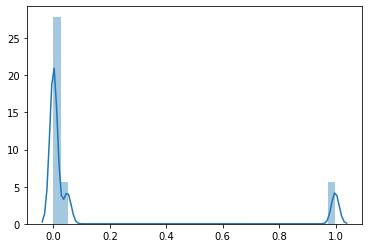

Income


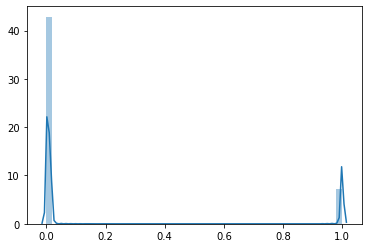

Monthly Premium Auto


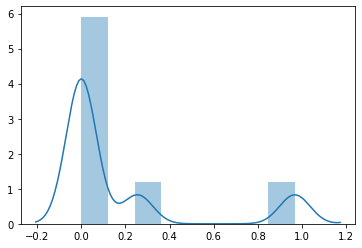

Months Since Last Claim


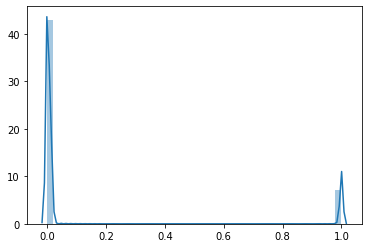

Months Since Policy Inception


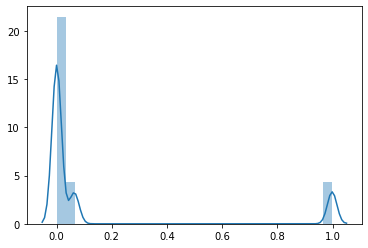

Number of Open Complaints


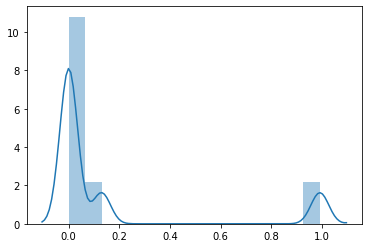

Number of Policies


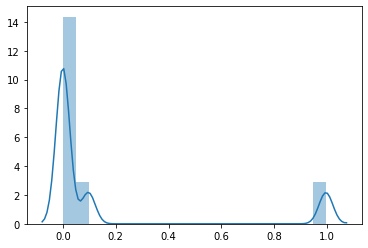

In [41]:
## Creating loop for showing the box plot of Normalized data
for i in range(len(cols)):
    print (cols[i])
    sns.distplot(x_normalized[i])
    plt.show()
    
i=i+1

In [42]:
#converting the normalized data into data frame
df_new = pd.DataFrame(x_normalized)

In [43]:
# concatinating both the data frames
DATA1 = pd.concat([df,df_new],join = 'inner',axis =1)

In [44]:
## Checking the data
DATA1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


Linear Regression

In [45]:
##X-Y testing
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 100)

In [46]:
## applying X_Y test into the model
model = LinearRegression ()

In [47]:
lm = model.fit(x_train , y_train)

In [48]:
predictions = lm.predict(x_test)

In [49]:
predictions

array([217.06915964, 662.33251833, 310.45489559, ..., 458.67157101,
       721.83227063, 315.70954569])

In [50]:
residual = predictions - y_test

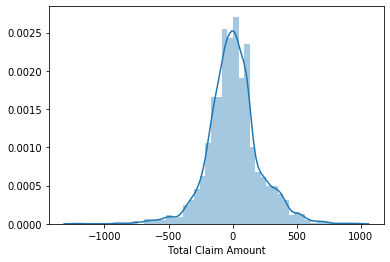

In [51]:
## Plotting residual 
sns.distplot(residual)

In [52]:
## finding MAE , MSE , r2 and RMSE score of the test set
MAE = mean_absolute_error (y_test , predictions)
MSE = mean_squared_error (y_test , predictions)
R2 = r2_score (y_test , predictions)
RMSE = sqrt(mean_squared_error (y_test , predictions))

In [53]:
print ("MAE of the linear model on the test set is" , MAE)
print ("MSE of the linear model on the test set is" , MSE)
print ("R2 score of the linear model on the test set is" , R2)
print ("RMSE score of the linear model on the test set is" , RMSE)

MAE of the linear model on the test set is 146.07551989840192
MSE of the linear model on the test set is 40377.30623408686
R2 score of the linear model on the test set is 0.4942343002265439
RMSE score of the linear model on the test set is 200.94105163974547
